In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score



In [24]:
dt = pd.read_csv("C:/Users/shanm/OneDrive/Desktop/project/voice_prediction/vocal_gender_features_new.csv")


In [ ]:
dt.head()


,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [25]:
X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label'],axis=1),dt['label'])


In [26]:
from sklearn.preprocessing import StandardScaler

    # Initialize StandardScaler
scaler = StandardScaler()
# X = mi1.drop(columns="charges")
# Apply StandardScaler only to the 'Age' column
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

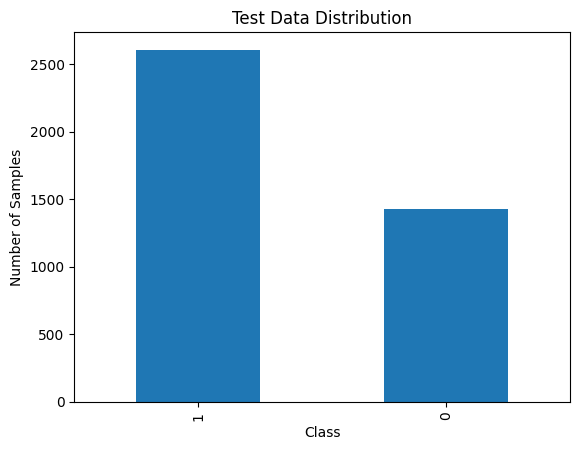

In [17]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()




In [27]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE


smt = SMOTE()


X_train_smsampled, y_train_smsampled= smt.fit_resample(X_train, y_train)


print('After Oversampling')
print(y_train_smsampled.value_counts())

After Oversampling
label
1    7754
0    7754
Name: count, dtype: int64


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train_smsampled, y_train_smsampled)

# Print model parameters
print("Model Parameters:")
print(model.get_params())

# Predictions
y_pred_train = model.predict(X_train_smsampled)
y_pred_test = model.predict(X_test)

# Compute metrics
f1_train = f1_score(y_train_smsampled, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train_smsampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_train = precision_score(y_train_smsampled, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train_smsampled, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

# Print metrics
print("\nTraining Metrics:")
print(f"F1 Score: {f1_train}")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")

print("\nTesting Metrics:")
print(f"F1 Score: {f1_test}")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")

# Print full classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Model Parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Training Metrics:
F1 Score: 0.9941294110057416
Accuracy: 0.994132060871808
Precision: 0.9945785465341422
Recall: 0.9936806809388703

Testing Metrics:
F1 Score: 0.9950438429279451
Accuracy: 0.9935595739410453
Precision: 0.9961832061068703
Recall: 0.993907083015994

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1411
           1       1.00      0.99      1.00      2626

    accuracy                           0.99      4037
   macro avg       0.99      0.99      0.99      4037
weighted avg       0.99      0.99      0.99      4037



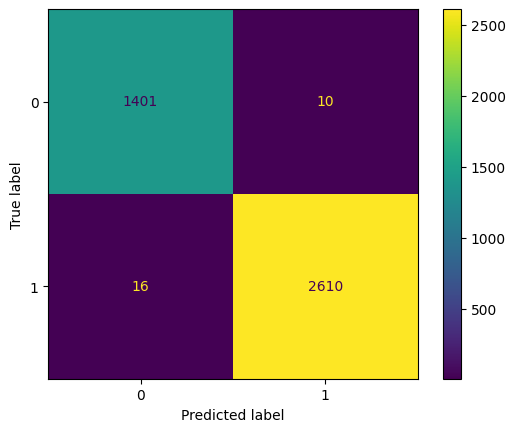

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


y_pred = model.predict(X_test)
con_mat = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(con_mat).plot()


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the SVM model
model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train, y_train)

# Print all model parameters
print("Model Parameters:")
print(model_svm.get_params())

# Predictions
y_pred_train = model_svm.predict(X_train_smsampled)
y_pred_test = model_svm.predict(X_test)

# Compute evaluation metrics
accuracy_train = accuracy_score(y_train_smsampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train_smsampled, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train_smsampled, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train_smsampled, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

# Print training and testing metrics
print("\nTraining Metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

# Print full classification report for test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


Model Parameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Testing Metrics:
Accuracy: 0.9995045826108496
Precision: 0.9996191926884996
Recall: 0.9996191926884996
F1 Score: 0.9996191926884996

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1411
           1       1.00      1.00      1.00      2626

    accuracy                           1.00      4037
   macro avg       1.00      1.00      1.00      4037
weighted avg       1.00      1.00      1.00      4037



In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the XGBoost model
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10,Randomstate=42)
model_xgb.fit(X_train_smsampled, y_train_smsampled)

# Print all model parameters
print("Model Parameters:")
print(model_xgb.get_params())

# Predictions
y_pred_train = model_xgb.predict(X_train_smsampled)
y_pred_test = model_xgb.predict(X_test)

# Compute evaluation metrics
accuracy_train = accuracy_score(y_train_smsampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train_smsampled, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train_smsampled, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train_smsampled, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

# Print training and testing metrics
print("\nTraining Metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

# Print full classification report for test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

c:\Users\shanm\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:22:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "Randomstate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'Randomstate': 42}

Training Metrics:
Accuracy: 1.0
Precision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the KNN model
model_knn = DecisionTreeClassifier(max_depth=4, random_state=42)
model_knn.fit(X_train_smsampled, y_train_smsampled)

# Print all model parameters
print("Model Parameters:")
print(model_knn.get_params())

# Predictions
y_pred_train = model_knn.predict(X_train_smsampled)
y_pred_test = model_knn.predict(X_test)

# Compute evaluation metrics
accuracy_train = accuracy_score(y_train_smsampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train_smsampled, y_pred_train, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')

recall_train = recall_score(y_train_smsampled, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

f1_train = f1_score(y_train_smsampled, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print training and testing metrics
print("\nTraining Metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

# Print full classification report for test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


Model Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Training Metrics:
Accuracy: 0.9191063174114021
Precision: 0.9217276184523883
Recall: 0.9191063174114021
F1 Score: 0.9189804205655356

Testing Metrics:
Accuracy: 0.8932375526380976
Precision: 0.9047893679836699
Recall: 0.8932375526380976
F1 Score: 0.8948774757040457

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.80      0.95      0.86      1445
           1       0.97      0.86      0.91      2592

    accuracy                           0.89      4037
   macro avg       0.88      0.90      0.89      4037
weighted avg       0.90      0.89      0.89      4037



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_smsampled, y_train_smsampled)

# Print all model parameters
print("Model Parameters:")
print(model_rf.get_params())

# Predictions
y_pred_train = model_rf.predict(X_train_smsampled)
y_pred_test = model_rf.predict(X_test)

# Compute evaluation metrics
accuracy_train = accuracy_score(y_train_smsampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train_smsampled, y_pred_train, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')

recall_train = recall_score(y_train_smsampled, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

f1_train = f1_score(y_train_smsampled, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print training and testing metrics
print("\nTraining Metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

# Print full classification report for test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Testing Metrics:
Accuracy: 0.9975229130542482
Precision: 0.9975235219901
Recall: 0.9975229130542482
F1 Score: 0.9975221513607098

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1445
           1       1.00      1.00      1.00      2592

    accuracy                           1.00      4037
   macro avg       1.00      1.00      1.00      4037
weighted avg       1.00      1.00      1.00      4037



In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


y_pred = model_xgb.predict(X_test)
con_mat = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(con_mat).plot()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt


In [ ]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import webbrowser

# Define your models
models = {
    "LogisticRegression(sm)": LogisticRegression(),
    "XGBoost(sm)": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42),
    "RandomForest(sm)": RandomForestClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42),
    "svc_model(sm)": SVC(kernel='rbf', probability=True),
    "DecisionTree(sm)": DecisionTreeClassifier(max_depth=4, random_state=42)
}

# Set tracking URI and experiment
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Voice Classification Model")

# Train and log each model
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train model
        model.fit(X_train_smsampled, y_train_smsampled)
        
        y_pred_train = model.predict(X_train_smsampled)
        y_pred_test = model.predict(X_test)

        # Evaluate metrics
        metrics = {
            "accuracy_train": accuracy_score(y_train_smsampled, y_pred_train),
            "precision_train": precision_score(y_train_smsampled, y_pred_train, average='weighted'),
            "recall_train": recall_score(y_train_smsampled, y_pred_train, average='weighted'),
            "f1_train": f1_score(y_train_smsampled, y_pred_train, average='weighted'),
            "accuracy_test": accuracy_score(y_test, y_pred_test),
            "precision_test": precision_score(y_test, y_pred_test, average='weighted'),
            "recall_test": recall_score(y_test, y_pred_test, average='weighted'),
            "f1_test": f1_score(y_test, y_pred_test, average='weighted'),
        }

        # Log model type
        mlflow.set_tag("model_name", model_name)

        # Log metrics
        for metric_name, value in metrics.items():
            mlflow.log_metric(metric_name, value)

        # Log model
        if model_name == "XGBoost(sm)":
            mlflow.xgboost.log_model(model, artifact_path=model_name)
        else:
            mlflow.sklearn.log_model(model, artifact_path=model_name)

        print(f"{model_name} logged successfully!")

print("✅ All models are logged in MLflow!")

# Open MLflow UI
webbrowser.open("http://localhost:5000")

2025/06/28 12:27:20 INFO mlflow.tracking.fluent: Experiment with name 'Voice Classification Model' does not exist. Creating a new experiment.
2025/06/28 12:27:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression(sm) logged successfully!
🏃 View run LogisticRegression(sm) at: http://localhost:5000/#/experiments/391362953416412047/runs/ecd6e8409aa141448dc6a5bc1b1011f7
🧪 View experiment at: http://localhost:5000/#/experiments/391362953416412047


c:\Users\shanm\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [12:27:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/06/28 12:27:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost(sm) logged successfully!
🏃 View run XGBoost(sm) at: http://localhost:5000/#/experiments/391362953416412047/runs/a56532b525754aef996d94a683c11436
🧪 View experiment at: http://localhost:5000/#/experiments/391362953416412047


2025/06/28 12:27:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest(sm) logged successfully!
🏃 View run RandomForest(sm) at: http://localhost:5000/#/experiments/391362953416412047/runs/572db11fee704a46bbf15ea8ab14ced5
🧪 View experiment at: http://localhost:5000/#/experiments/391362953416412047


2025/06/28 12:28:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


svc_model(sm) logged successfully!
🏃 View run svc_model(sm) at: http://localhost:5000/#/experiments/391362953416412047/runs/18a5fcc4ee4e44e0a12e291480d6c894
🧪 View experiment at: http://localhost:5000/#/experiments/391362953416412047


2025/06/28 12:28:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTree(sm) logged successfully!
🏃 View run DecisionTree(sm) at: http://localhost:5000/#/experiments/391362953416412047/runs/43f48819ed894d0da4a0a7be280e48e8
🧪 View experiment at: http://localhost:5000/#/experiments/391362953416412047
✅ All models are logged in MLflow!


True

In [34]:
import pickle

# Assuming 'model' is your trained model
with open('model1.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

In [32]:
with open('sscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [4]:
dt = pd.read_csv("C:/Users/shanm/OneDrive/Desktop/project/voice_prediction/vocal_gender_features_new.csv")
X1_train = dt.drop(['label'],axis=1)

Silhouette Score: 0.410
Davies-Bouldin Index: 0.891
Calinski-Harabasz Index: 16704.818


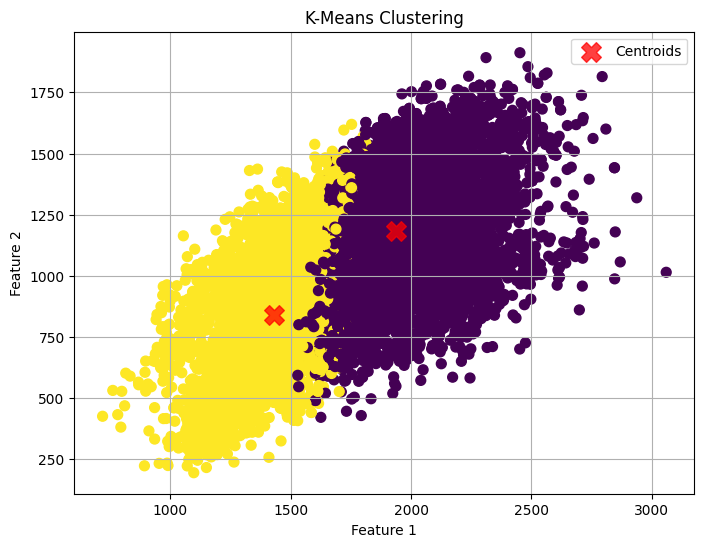

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    mutual_info_score
)


# Step 2: Scale the features
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train_smsampled)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=2)
label1=kmeans.fit_predict(X1_train)
# label1 = kmeans.labels_
# Unsupervised metrics
silhouette = silhouette_score(X1_train, label1)
db_index = davies_bouldin_score(X1_train, label1)
ch_index = calinski_harabasz_score(X1_train, label1)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")
# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X1_train["mean_spectral_centroid"], X1_train["std_spectral_centroid"], c=label1, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Silhouette Score: 0.411
Davies-Bouldin Index: 0.890
Calinski-Harabasz Index: 16648.190


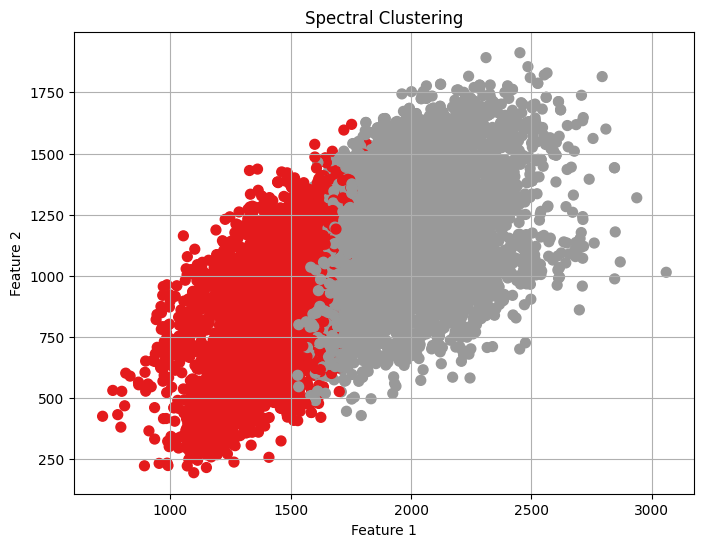

In [8]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
label2 = spectral.fit_predict(X1_train)
# Unsupervised metrics
silhouette = silhouette_score(X1_train, label2)
db_index = davies_bouldin_score(X1_train, label2)
ch_index = calinski_harabasz_score(X1_train, label2)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")
# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X1_train["mean_spectral_centroid"], X1_train["std_spectral_centroid"], c=label2, cmap='Set1', s=50)
plt.title("Spectral Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Silhouette Score: 0.391
Davies-Bouldin Index: 0.915
Calinski-Harabasz Index: 15757.715


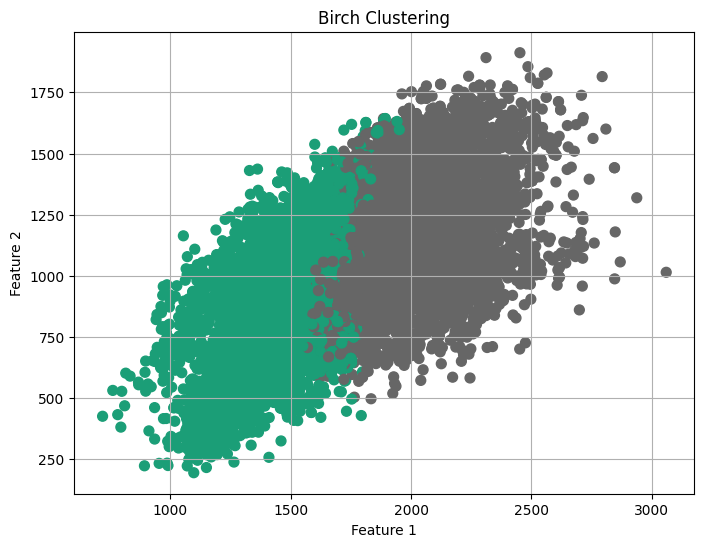

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    mutual_info_score
)
# Apply Birch clustering
birch = Birch(n_clusters=2)
label4 = birch.fit_predict(X1_train)
# Unsupervised metrics
silhouette = silhouette_score(X1_train, label4)
db_index = davies_bouldin_score(X1_train, label4)
ch_index = calinski_harabasz_score(X1_train, label4)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")
# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X1_train["mean_spectral_centroid"], X1_train["std_spectral_centroid"], c=label4, cmap='Dark2', s=50)
plt.title("Birch Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Silhouette Score: 0.372
Davies-Bouldin Index: 0.934
Calinski-Harabasz Index: 14317.044


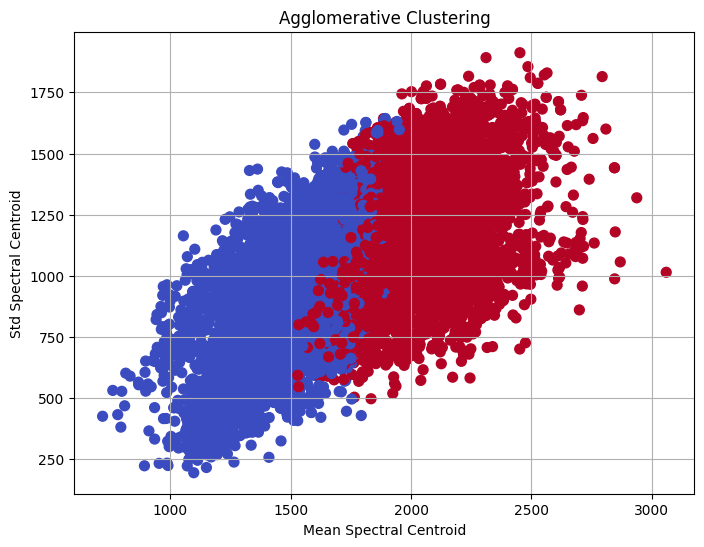

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
label3 = agg.fit_predict(X1_train)
# Unsupervised metrics
silhouette = silhouette_score(X1_train, label3)
db_index = davies_bouldin_score(X1_train, label3)
ch_index = calinski_harabasz_score(X1_train, label3)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X1_train["mean_spectral_centroid"], X1_train["std_spectral_centroid"],
            c=label5, cmap='coolwarm', s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("Mean Spectral Centroid")
plt.ylabel("Std Spectral Centroid")
plt.grid(True)
plt.show()

In [13]:
import mlflow
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    mutual_info_score
)
import webbrowser

models = {
    "kmeans": KMeans(n_clusters=2),
    "spectral":SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans'),
    "birch": Birch(n_clusters=2),
    "agglomerative": AgglomerativeClustering(n_clusters=2, linkage='ward')
    
}

# Set tracking URI and experiment
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Voice Clustering Model")

# Train and log each model
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train model
        labels=model.fit_predict(X1_train)
     

        # Evaluate metrics
        metrics = {
            "Silhouette_Score":silhouette_score(X1_train, labels),
            "db_index ": davies_bouldin_score(X1_train, labels),
        
            "ch_index":calinski_harabasz_score(X1_train, labels)

        }

        # Log model type
        mlflow.set_tag("model_name", model_name)

        # Log metrics
        for metric_name, value in metrics.items():
            mlflow.log_metric(metric_name, value)

        # Log model
       
        mlflow.sklearn.log_model(model, artifact_path=model_name)

        print(f"{model_name} logged successfully!")

print("✅ All models are logged in MLflow!")

# Open MLflow UI
webbrowser.open("http://localhost:5000")

2025/06/28 15:59:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


kmeans logged successfully!
🏃 View run kmeans at: http://localhost:5000/#/experiments/125060000168636837/runs/3eed8755b448422697ac1b2166608f6d
🧪 View experiment at: http://localhost:5000/#/experiments/125060000168636837


2025/06/28 15:59:52 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/06/28 15:59:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


spectral logged successfully!
🏃 View run spectral at: http://localhost:5000/#/experiments/125060000168636837/runs/31609ab0f18b49e3956993cff47ebf58
🧪 View experiment at: http://localhost:5000/#/experiments/125060000168636837


2025/06/28 16:00:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


birch logged successfully!
🏃 View run birch at: http://localhost:5000/#/experiments/125060000168636837/runs/2d077e503f06460e959d695ba8e2fd3b
🧪 View experiment at: http://localhost:5000/#/experiments/125060000168636837


2025/06/28 16:00:42 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/06/28 16:00:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


agglomerative logged successfully!
🏃 View run agglomerative at: http://localhost:5000/#/experiments/125060000168636837/runs/43ebcc47df334e1c8ddc2841df2f7c56
🧪 View experiment at: http://localhost:5000/#/experiments/125060000168636837
✅ All models are logged in MLflow!


True

In [33]:
import pickle

# Assuming 'model' is your trained model
with open('model2.pkl', 'wb') as file:
    pickle.dump(kmeans, file)